In [1]:
import pandas as pd

adj_data = pd.read_csv('adj_data.csv')
data_cleaned = pd.read_csv('data_cleaned.csv')

In [2]:
#split data for summary statistics
def convert_cat(df):
    """
    Looks through each variable in df to find its unique values.
    If the number of unique values is less than 9 it converts that variable form a float to an object
    Parameters:
        df (pd.DataFrame): The dataset to be fixed.

    Returns:
        pd.DataFrame: categorical variables converted to object
    """
    
    df = df.copy()  # Avoid modifying the original DataFrame
    
    for col in df.columns:
        if df[col].nunique() < 9:  # Threshold for categorical variables
            if df[col].dtype == 'float64':  # Ensure only float columns are converted
                df[col] = df[col].astype('object')# Convert to categorical type
                df[col] = df[col].round()
    return df
data = convert_cat(adj_data)
print(data.info())

cat_cols = data.select_dtypes(include=['object'])
num_cols = data.select_dtypes(include=['number'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3551 entries, 0 to 3550
Data columns (total 41 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RIAGENDR  3551 non-null   object 
 1   RIDAGEYR  3551 non-null   float64
 2   RIDRETH3  3551 non-null   object 
 3   DMDBORN4  3551 non-null   object 
 4   DMDEDUC2  3551 non-null   object 
 5   DMDMARTZ  3551 non-null   object 
 6   INDFMPIR  3551 non-null   float64
 7   ALQ111    3551 non-null   object 
 8   BMXBMI    3551 non-null   float64
 9   BMXWAIST  3551 non-null   float64
 10  BPXOSY1   3551 non-null   float64
 11  BPXOSY2   3551 non-null   float64
 12  BPXOSY3   3551 non-null   float64
 13  BPXODI1   3551 non-null   float64
 14  BPXODI2   3551 non-null   float64
 15  DIQ010    3551 non-null   object 
 16  DR1TKCAL  3551 non-null   float64
 17  DR1TPROT  3551 non-null   float64
 18  DR1TCARB  3551 non-null   float64
 19  DR1TSUGR  3551 non-null   float64
 20  DR1TFIBE  3551 non-null   floa

In [3]:
# Numerical summary stats 
numerical_summary = num_cols.describe()

# Skewness and Kurtosis for numerical columns
skewness = num_cols.skew()
kurtosis = num_cols.kurt()

# Range for numerical columns (difference between max and min)
range_stats = num_cols.max() - num_cols.min()

#count of unique values
uniq=num_cols.nunique()

# Missing values count for numerical columns before being filled
data_cleaned = convert_cat(data_cleaned)
missing = data_cleaned.isnull().sum()

#combine info
full_summary = numerical_summary.T 
full_summary['Skewness'] = skewness
full_summary['Kurtosis'] = kurtosis
full_summary['Range'] = range_stats
full_summary['Unique values'] = uniq
full_summary['Missing values'] = missing

full_summary_df = pd.DataFrame(round(full_summary, 2))
# Print the full summary
full_summary_df


,count,mean,std,min,25%,50%,75%,max,Skewness,Kurtosis,Range,Unique values,Missing values
RIDAGEYR,3551.0,52.78,18.13,18.0,37.00,57.00,68.00,80.00,-0.30,-1.08,62.00,63,0
INDFMPIR,3551.0,2.96,1.54,0.0,1.67,2.96,4.67,5.00,-0.08,-1.18,5.00,416,479
BMXBMI,3551.0,29.60,7.38,11.1,24.50,28.40,33.10,74.80,1.27,2.83,63.70,380,50
BMXWAIST,3551.0,100.36,16.62,60.0,88.60,99.80,109.95,177.20,0.58,0.60,117.20,749,175
BPXOSY1,3551.0,121.91,17.88,75.0,110.00,120.00,131.00,224.00,0.93,1.81,149.00,123,131
BPXOSY2,3551.0,121.87,17.77,65.0,110.00,120.00,131.00,215.00,0.89,1.71,150.00,123,134
BPXOSY3,3551.0,121.55,17.60,62.0,110.00,120.00,130.00,205.00,0.86,1.58,143.00,123,145
BPXODI1,3551.0,74.72,11.12,37.0,67.50,74.00,81.00,131.00,0.53,1.05,94.00,83,131
BPXODI2,3551.0,73.96,11.06,36.0,67.00,73.97,80.00,129.00,0.49,1.02,93.00,82,134
DR1TKCAL,3551.0,1974.91,808.73,0.0,1511.00,1976.35,2250.50,10446.00,1.73,8.52,10446.00,1827,741


In [4]:
# Compute summary statistics for categorical data
d1 = cat_cols.apply(lambda x: x.value_counts().to_dict())  # Frequency counts

# Missing values befor cleaning
missing_cat = data_cleaned.select_dtypes(include=['object'])
d2 = missing_cat.isnull().sum()  

# Unique values
uniq = cat_cols.nunique()  

# Combine into a DataFrame
cat_summary = pd.DataFrame({
    'Most Common Value': d1.apply(lambda x: max(x, key=x.get) if x else None),# most common value
    'Least Common Value': d1.apply(lambda x: min(x, key=x.get) if x else None), # least common value
    'Missing Values': d2,
    'Unique Categories': uniq})
round(cat_summary)

,Most Common Value,Least Common Value,Missing Values,Unique Categories
RIAGENDR,2.0,1.0,0,2
RIDRETH3,3.0,6.0,0,6
DMDBORN4,1.0,2.0,0,2
DMDEDUC2,5.0,1.0,137,5
DMDMARTZ,1.0,3.0,138,3
ALQ111,1.0,2.0,513,2
DIQ010,2.0,1.0,0,2
SMQ020,2.0,1.0,1,2
DPQ040,0.0,3.0,493,4
DPQ050,0.0,0.0,494,5


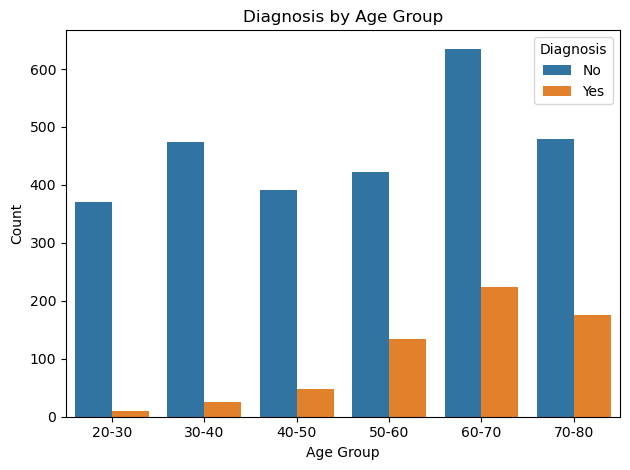

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

temp = data

temp['Diagnosis'] = temp['DIQ010'].map({1: 'Yes', 2: 'No'})

age_range = [20, 30, 40, 50, 60, 70, 80]
age_labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70-80']
temp['Age_Group'] = pd.cut(temp['RIDAGEYR'], bins=age_range, labels=age_labels)


sns.countplot(x='Age_Group', hue='Diagnosis', data=temp)
plt.title('Diagnosis by Age Group')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

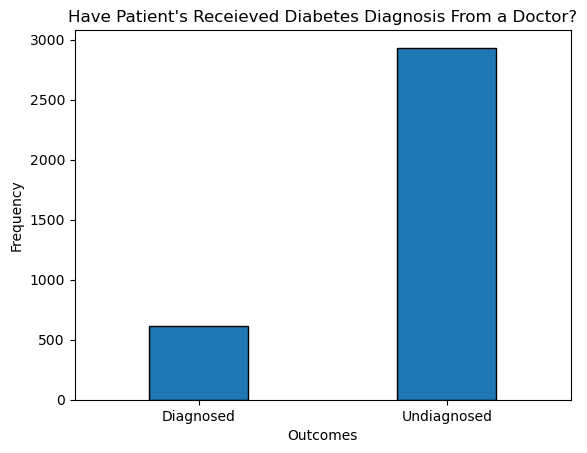

In [14]:
## Histogram to show the disparity between the people who were diagnosed and who were not

import matplotlib.pyplot as plt
diagnosis = data['DIQ010']

# Create the histogram
plt.hist(diagnosis, bins=range(1,4), align = 'left', edgecolor='black', rwidth = 0.4)

# Customize the plot
plt.title("Have Patient's Receieved Diabetes Diagnosis From a Doctor?")
plt.xlabel('Outcomes')
plt.ylabel('Frequency')
plt.xticks([1, 2], ['Diagnosed', 'Undiagnosed'])
plt.xlim(0.5, 2.5)

# Show the histogram
plt.show()